In [1]:
# passed on Python 3.10.7 @ Windows 11 and Python 3.10.6 @ MacOS Monterey

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv('data1forEx1to4/train1_icu_data.csv')
mm = StandardScaler()
df = pd.DataFrame(mm.fit_transform(df), columns=df.columns)
df_label = pd.read_csv('data1forEx1to4/train1_icu_label.csv')
df['label'] = df_label['hospital_death']

## Fisher's Linear Discriminant (FLD)

In [26]:
# m_1
m_1 = df[df['label'] == 1].drop('label', axis=1).values.mean(axis=0).reshape(-1, 1)

# m_0
m_0 = df[df['label'] == 0].drop('label', axis=1).values.mean(axis=0).reshape(-1, 1)

(108,)

In [35]:
cluster_1 = df[df['label'] == 1].drop('label', axis=1).values
cluster_0 = df[df['label'] == 0].drop('label', axis=1).values

In [45]:
S_w = np.zeros((df.shape[1] - 1, df.shape[1] - 1))

# for cluster 0: (x_i - m_0)(x_i - m_0)^T, x_i\in cluster 0
for i in range(cluster_0.shape[0]):
    array = cluster_0[i].reshape(-1, 1) - m_0
    S_w += array @ array.T

# for cluster 1: (x_i - m_1)(x_i - m_1)^T, x_i\in cluster 1
for i in range(cluster_1.shape[0]):
    array = cluster_1[i].reshape(-1, 1) - m_1
    S_w += array @ array.T

In [51]:
# w = S_w^{-1} * (m_1 - m_0)
w = np.linalg.pinv(S_w) @ (m_1 - m_0)

# w_0
w_0 = (-0.5 * (w.T @ (m_1 + m_0)))[0][0]

In [61]:
def y(x):
    '''
    Fisher's Linear Discriminant
    '''
    return w.T @ x + w_0

def score():
    count = df.shape[0]
    matrix = df.drop('label', axis=1).values
    n = 0
    for index in range(count):
        if y(matrix[index].reshape(-1, 1)) > 0 and df['label'][index] == 1:
            n += 1
        elif y(matrix[index].reshape(-1, 1)) < 0 and df['label'][index] == 0:
            n += 1
    
    return n / count

print(score())
    

0.7944


In [274]:
m_1 = np.mean(cluster_1, axis=0).reshape(-1, 1)
m_0 = np.mean(cluster_0, axis=0).reshape(-1, 1)

In [275]:
S_w = np.zeros((df.shape[1] - 1, df.shape[1] - 1))
for i in range(cluster_1.shape[0]):
    S_w += (cluster_1[i].reshape(-1, 1) - m_1) @ (cluster_1[i].reshape(-1, 1) - m_1).T
for i in range(cluster_0.shape[0]):
    S_w += (cluster_0[i].reshape(-1, 1) - m_0) @ (cluster_0[i].reshape(-1, 1) - m_0).T

In [276]:
w = np.linalg.pinv(S_w) @ (m_1 - m_0)
w_0 = -0.5 * (w.T @ m_1 + w.T @ m_0)

In [277]:
def verify(x):
    return 1 if x > 0 else 0

result = np.vectorize(verify)(df.values[:, :-1] @ w + w_0[0][0])

In [278]:
check = result.reshape(1, -1)[0] == df['label'].values
check.sum() / check.shape[0]

0.7944

In [279]:
test_value = pd.read_csv('data1forEx1to4/test1_icu_data.csv')
test_value = pd.DataFrame(mm.transform(test_value), columns=test_value.columns).values

test_label = pd.read_csv('data1forEx1to4/test1_icu_label.csv').values
test_result = np.vectorize(verify)(test_value @ w + w_0[0][0])

test_check = test_result.reshape(1, -1)[0] == test_label.reshape(1, -1)[0]
test_check.sum() / test_check.shape[0]

0.7757520510483136

## Perceptron via `scikit-learn`

In [67]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

clf = Perceptron()
clf.fit(df.drop('label', axis=1).values, df['label'].values)
clf.score(df.drop('label', axis=1).values, df['label'].values)
# (height, age, ...) -> (death / survival, boolean)

df_test = pd.read_csv('data1forEx1to4/test1_icu_data.csv')
df_test = pd.DataFrame(mm.transform(df_test), columns=df_test.columns)
df_test_label = pd.read_csv('data1forEx1to4/test1_icu_label.csv')
clf.score(df_test.values, df_test_label['hospital_death'].values)

cross_val_score(clf, df_test.values, df_test_label['hospital_death'].values, cv=10)

array([0.72727273, 0.7       , 0.73636364, 0.76363636, 0.76363636,
       0.70909091, 0.77272727, 0.60550459, 0.66972477, 0.76146789])

In [280]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(df.values[:, :-1], df['label'].values)
train_score = clf.score(df.values[:, :-1], df['label'].values)

test_value = pd.read_csv('data1forEx1to4/test1_icu_data.csv')
test_value = pd.DataFrame(mm.transform(test_value), columns=test_value.columns).values

test_label = pd.read_csv('data1forEx1to4/test1_icu_label.csv').values
test_score = clf.score(test_value, test_label)

print('Train score: {:.3f}, Test score: {:.3f}'.format(train_score, test_score))

Train score: 0.691, Test score: 0.656


In [281]:
df = pd.read_csv('data1forEx1to4/train2_icu_data.csv')
mm = StandardScaler()
df = pd.DataFrame(mm.fit_transform(df), columns=df.columns)
df_label = pd.read_csv('data1forEx1to4/train2_icu_label.csv')
df['label'] = df_label['hospital_death']

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(df.values[:, :-1], df['label'].values)
train_score = clf.score(df.values[:, :-1], df['label'].values)

test_value = pd.read_csv('data1forEx1to4/test2_icu_data.csv')
test_value = pd.DataFrame(mm.transform(test_value), columns=test_value.columns).values

test_label = pd.read_csv('data1forEx1to4/test2_icu_label.csv').values
test_score = clf.score(test_value, test_label)

print('Train score: {:.3f}, Test score: {:.3f}'.format(train_score, test_score))

Train score: 1.000, Test score: 0.831


In [282]:
# cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf, df.values[:, :-1], df['label'].values, cv=10)

array([0.98648649, 1.        , 0.97972973, 0.98648649, 0.98648649,
       0.98639456, 0.98639456, 0.96598639, 0.98639456, 0.99319728])

## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression()
clf.fit(df.drop('label', axis=1).values, df['label'].values)
clf.score(df.drop('label', axis=1).values, df['label'].values)
# (height, age, ...) -> (death / survival, boolean)

df_test = pd.read_csv('data1forEx1to4/test1_icu_data.csv')
df_test = pd.DataFrame(mm.transform(df_test), columns=df_test.columns)
df_test_label = pd.read_csv('data1forEx1to4/test1_icu_label.csv')
clf.score(df_test.values, df_test_label['hospital_death'].values)

cross_val_score(clf, df_test.values, df_test_label['hospital_death'].values, cv=10)

array([0.74545455, 0.75454545, 0.80909091, 0.83636364, 0.73636364,
       0.7       , 0.81818182, 0.72477064, 0.73394495, 0.7706422 ])

In [78]:
clf.predict_proba(df_test.values).shape

(1097, 2)

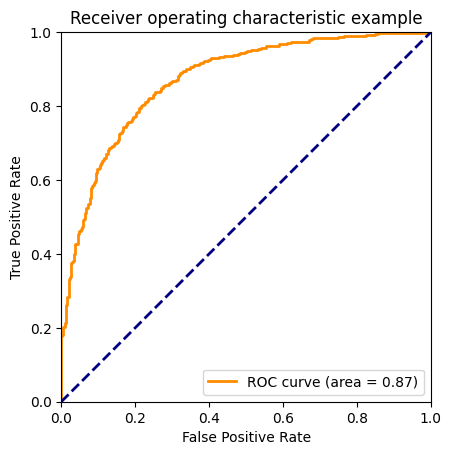

In [74]:
# roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(
    df_test_label['hospital_death'].values,
    clf.predict_proba(df_test.values)[:, 1]
)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.axis('square')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [283]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('data1forEx1to4/train1_icu_data.csv')
mm = StandardScaler()
df = pd.DataFrame(mm.fit_transform(df), columns=df.columns)
df_label = pd.read_csv('data1forEx1to4/train1_icu_label.csv')
df['label'] = df_label['hospital_death']

clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(df.values[:, :-1], df['label'].values)
train_score = clf.score(df.values[:, :-1], df['label'].values)

test_value = pd.read_csv('data1forEx1to4/test1_icu_data.csv')
test_value = pd.DataFrame(mm.transform(test_value), columns=test_value.columns).values

test_label = pd.read_csv('data1forEx1to4/test1_icu_label.csv').values
test_score = clf.score(test_value, test_label)

print('Train score: {:.3f}, Test score: {:.3f}'.format(train_score, test_score))

Train score: 0.797, Test score: 0.788


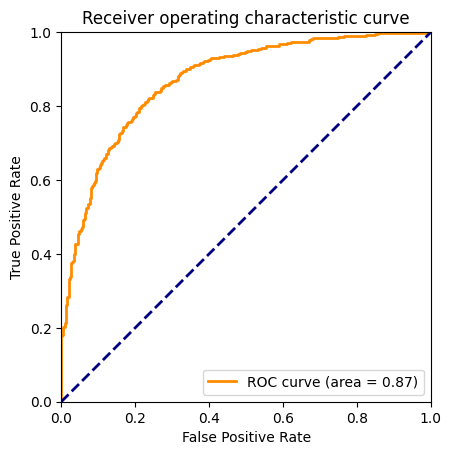

In [284]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_label, clf.predict_proba(test_value)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.axis('square')
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png', dpi=180)
plt.show()